# Demo Code

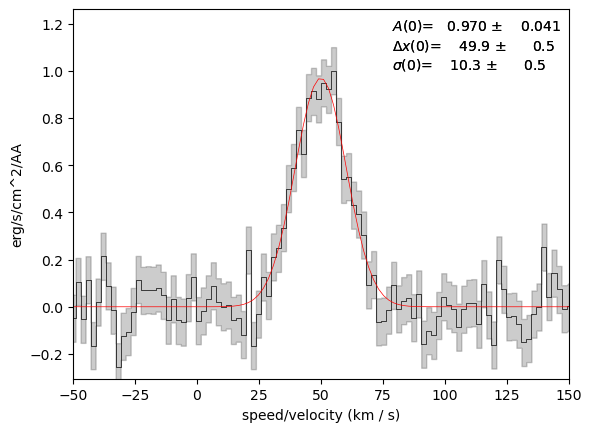

In [1]:
import numpy as np
import pyspeckit as pyspeckit

xaxis = np.linspace(-50,150,100)
sigma = 10.
center = 50.
synth_data = np.exp(-(xaxis-center)**2/(sigma**2 * 2.))

# Add noise
stddev = 0.1
noise = np.random.randn(xaxis.size)*stddev
error = stddev*np.ones_like(synth_data)
data = noise+synth_data

# this will give a "blank header" warning, which is fine
sp = pyspeckit.Spectrum(data=data, error=error, xarr=xaxis,
                        xarrkwargs={'unit':'km/s'},
                        unit='erg/s/cm^2/AA')

sp.plotter()

# Fit with automatic guesses
sp.specfit(fittype='gaussian')

# Fit with input guesses
# The guesses initialize the fitter
# This approach uses the 0th, 1st, and 2nd moments
amplitude_guess = data.max()
center_guess = (data*xaxis).sum()/data.sum()
width_guess = (data.sum() / amplitude_guess / (2*np.pi))**0.5
guesses = [amplitude_guess, center_guess, width_guess]
sp.specfit(fittype='gaussian', guesses=guesses)

sp.plotter(errstyle='fill')
sp.specfit.plot_fit()

# Visualizing the data

Text(0.5, 1.0, 'Wavelength vs Flux (visualizing data)')

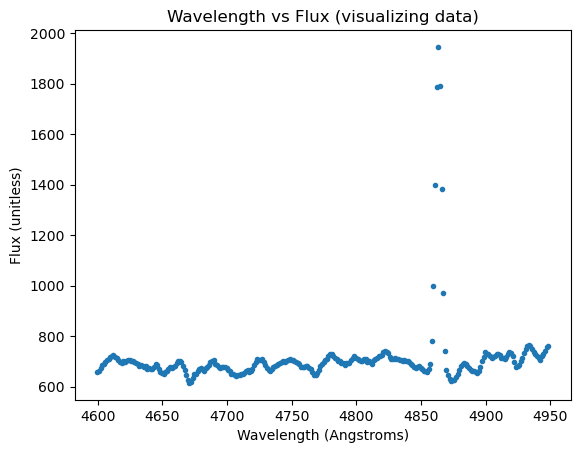

In [2]:
import matplotlib.pyplot as plt
data = np.genfromtxt("ngc253_hb.tab")

wavelength = data[:,0]
flux = data[:,1]

fig, ax = plt.subplots()
ax.scatter(wavelength, flux, marker = '.')
ax.set_xlabel("Wavelength (Angstroms)")
ax.set_ylabel("Flux (unitless)")
ax.set_title("Wavelength vs Flux (visualizing data)")

# Fitting the data

27.84958494424959
Error 'FigureManagerBase' object has no attribute 'key_press' was raised when trying to connect the key_press handler.  Please file an issue on github.  You may try a different matplotlib backend as a temporary workaround


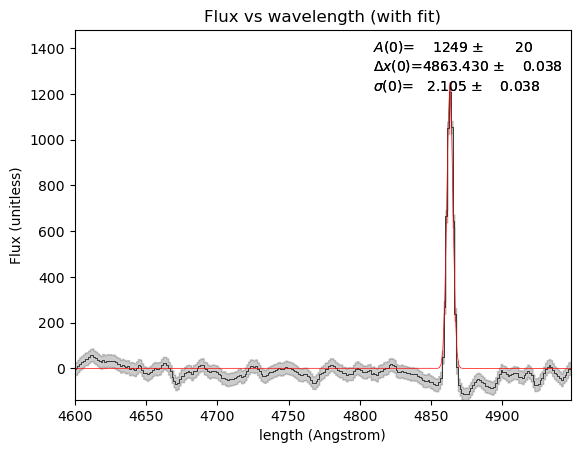

In [3]:
import numpy as np
import pyspeckit as pspeck
from astropy import units as u

# sigma = 10.
# center = 50.

# Add noise
y_below = flux[:207]
y_above = flux[217:]
y_noise = np.concatenate((y_below, y_above))
stddev = np.std(y_noise)
print(stddev)

noise = np.random.randn(wavelength.size)*stddev
error = stddev*np.ones_like(flux)
# data = noise+flux

# this will give a "blank header" warning, which is fine
sp = pyspeckit.Spectrum(data=flux, error=error, xarr=wavelength, xarrkwargs = {'unit': "AA"},
                        unit='Flux (unitless)')

sp.plotter()
sp.baseline()

# Fit with automatic guesses
sp.specfit(fittype='gaussian')

# Fit with input guesses
# The guesses initialize the fitter
# This approach uses the 0th, 1st, and 2nd moments
amplitude_guess = flux.max()
center_guess = 4863.45849609375
width_guess = 5
guesses = [amplitude_guess, center_guess, width_guess]
sp.specfit(fittype='gaussian', guesses=guesses)

sp.plotter(errstyle='fill', title = "Flux vs wavelength (with fit)")
sp.specfit.plot_fit()
sp.plotter.savefig("FinalFigure.png")